# Access blueprints with R

This notebook outlines how you can use R to access blueprints from either the Leaderboard or the Repository.

In DataRobot, you can find models as trained blueprints or as blueprints available for training. Trained blueprints are located on the model Leaderboard, and blueprints you may want to train are available in the model Repository.

When you run a project using a mode other than Comprehensive Autopilot, DataRobot first creates blueprints based on the characteristics of your data and puts them in the Repository. Then, it chooses a subset from these to train; when training completes, these are the blueprints you’ll find in the Leaderboard.

At times, after the Leaderboard is populated, it can be useful to train some of those blueprints that DataRobot skipped. For example, you can try a more complex Keras blueprint like Keras Residual AutoInt Classifier using Training Schedule (3 Attention Layers with 2 Heads, 2 Layers: 100, 100 Units). In some cases, you can directly access the trained model through R and retrain it with a different feature list or tune its hyperparameters.

## Install packages and connect to DataRobot

Before proceeding, run the following command to import the DataRobot library and connect to DataRobot by providing your endpoint and [API key](https://docs.datarobot.com/en/docs/platform/account-mgmt/acct-settings/api-key-mgmt.html).

In [ ]:
library(datarobot)

ConnectToDataRobot(endpoint = "YOUR ENDPOINT",
                   token = "YOUR TOKEN")

## Access blueprints from the Leaderboard

This example requires that you already have a project. The project ID is in the application's URL and is preceded by `projects/`:

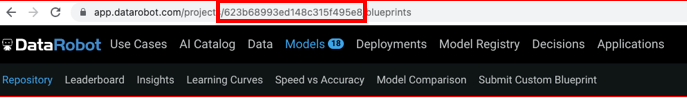!

Use the code below to find all blueprints trained for the project.

In [ ]:
project <- GetProject(projectId)
modelsInLeaderboard <- ListModels(project)
modelsInLeaderboard_df <- as.data.frame(modelsInLeaderboard)

View a sample result below. The table provides information for all models built, including type of model (blueprint) and IDs for each model and related blueprint, as well as the feature lists used to build the models, the sample size, and the metric chosen for the validation set. In this case, the metric was LogLoss, so what you see here is the LogLoss.

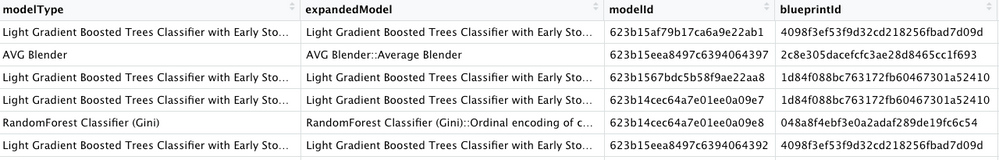

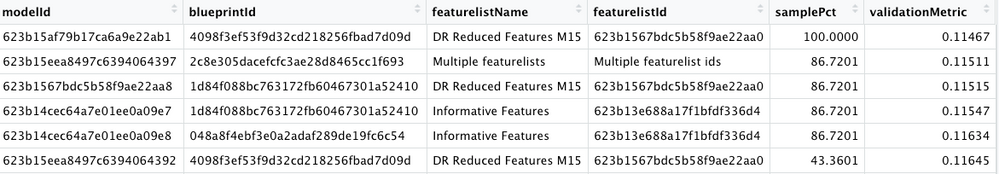

## Access blueprints from the Repository

You can check all blueprints in the Repository for the project using the following function:

In [ ]:
blueprintsInRepository <- ListBlueprints(project)

This function returns a list of blueprints with their `modelType`, `expandedModel`, and `blueprintId`. These blueprints are specifically created for this project, so you’ll also get a projectId column. The API response is converted from a list to a dataframe to make it easier to interpret, as shown below

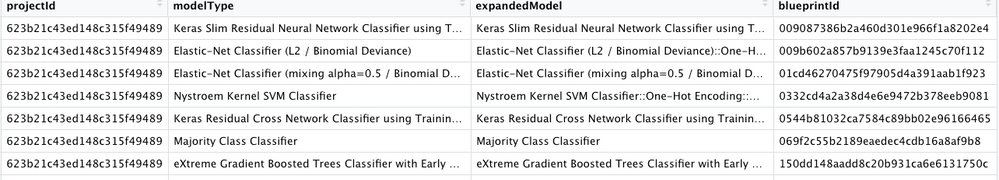

To train a specific blueprint, you can call `RequestNewModel`. At a minimum, this method requires a project and a list of blueprints. This example trains the first four blueprints from all blueprints in the Repository.

In [ ]:
RequestNewModel(project,blueprintsInRepository[1:4])

The first item in `blueprintsInRepository[[1]]`, as shown below, is a Majority Class Classifier, with blueprint ID "69f2c55b2189eaedec4cdb16a8af9b8":

In [ ]:
$projectId
[1] "623c6e72bffdbd1f4a1ad8f3"
$modelType
[1] "Majority Class Classifier"
$processes
[1] "Majority Class Classifier"
$blueprintCategory
[1] "DataRobot"
$supportsMonotonicConstraints
[1] FALSE
$monotonicIncreasingFeaturelistId
NULL
$monotonicDecreasingFeaturelistId
NULL
$blueprintId

For more information, access the detailed workflow in the [Community GitHub repository](https://github.com/datarobot-community/examples-for-data-scientists/blob/master/Initiating%20Projects/Python/Starting%20a%20Project%20with%20Selected%20Blueprints.ipynb).